## Machine Learning workflow

In [75]:
"""
Problem Statement Example:
Goal: Predict house prices
Type: Regression problem
Success Metric: Predictions within $50,000 of actual price
Required Data: House features (size, location, etc.)
Business Impact: Help real estate agents price houses accurately
"""

'\nProblem Statement Example:\nGoal: Predict house prices\nType: Regression problem\nSuccess Metric: Predictions within $50,000 of actual price\nRequired Data: House features (size, location, etc.)\nBusiness Impact: Help real estate agents price houses accurately\n'

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('house_data.csv')

# Quick overview
print("Dataset Shape:", df.shape)
print("\nFeature Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Basic statistics
print("\nSummary Statistics:")
print(df.describe())

Dataset Shape: (2000, 10)

Feature Types:
 Id            int64
Area          int64
Bedrooms      int64
Bathrooms     int64
Floors        int64
YearBuilt     int64
Location     object
Condition    object
Garage       object
Price         int64
dtype: object

Missing Values:
 Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

Summary Statistics:
                Id         Area     Bedrooms   Bathrooms       Floors  \
count  2000.000000  2000.000000  2000.000000  2000.00000  2000.000000   
mean   1000.500000  2786.209500     3.003500     2.55250     1.993500   
std     577.494589  1295.146799     1.424606     1.10899     0.809188   
min       1.000000   501.000000     1.000000     1.00000     1.000000   
25%     500.750000  1653.000000     2.000000     2.00000     1.000000   
50%    1000.500000  2833.000000     3.000000     3.00000     2.000000   
75%    1500.250000  3887.50000

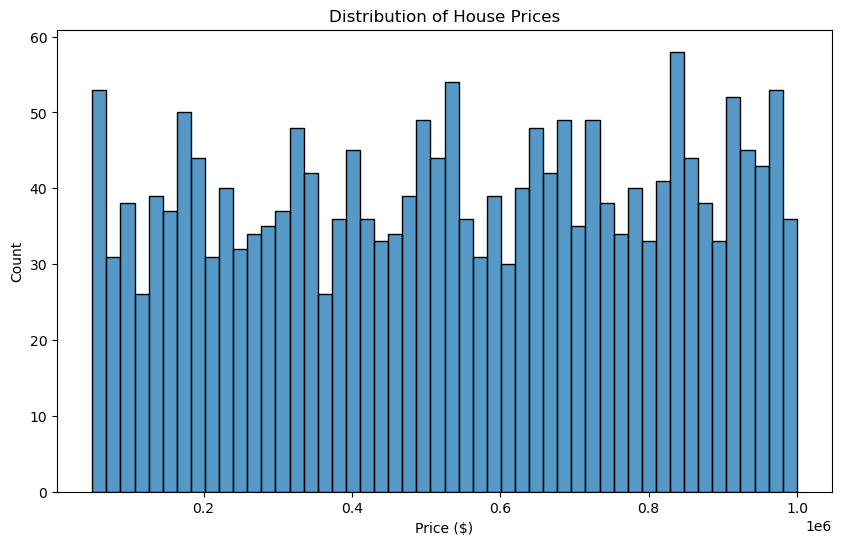

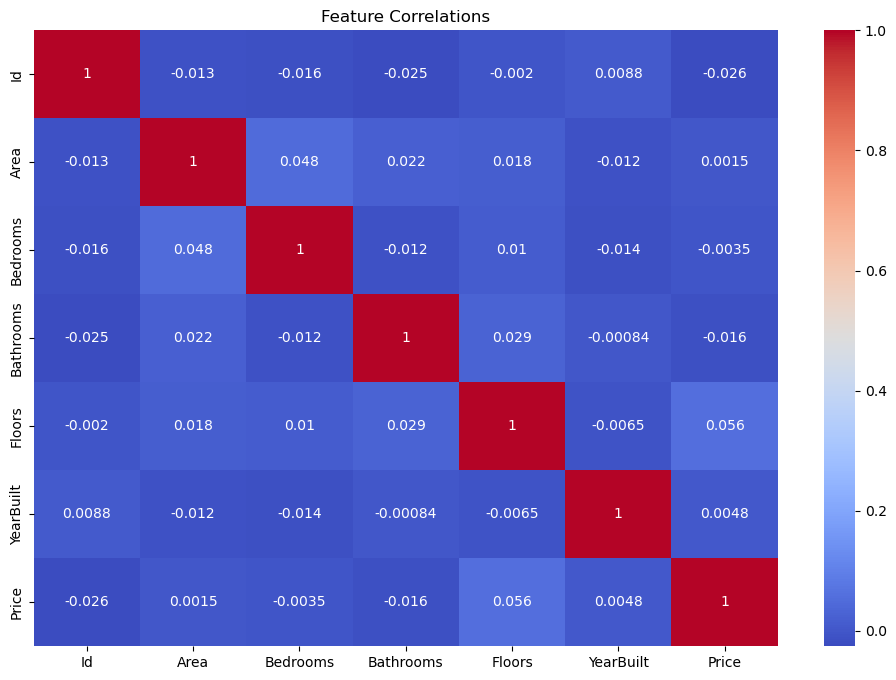

In [77]:
# EDA helps us understand patterns and relationships in our data:

# Distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price', bins=50)
plt.title('Distribution of House Prices')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

## Helper Class to clean data

In [78]:
class DataCleaner:
    """Helper class for data cleaning"""
    
    def __init__(self, df):
        self.df = df.copy()
    
    def handle_missing_values(self):
        """Fill missing values appropriately"""
        # Numerical: use median for skewed data
        numeric_cols = self.df.select_dtypes(include=[np.number]).columns
        for col in numeric_cols:
            if self.df[col].isnull().any():
                median = self.df[col].median()
                self.df[col] = self.df[col].fillna(median)
        
        # Categorical: use mode
        categorical_cols = self.df.select_dtypes(include=['object']).columns
        for col in categorical_cols:
            if self.df[col].isnull().any():
                mode = self.df[col].mode()[0]
                self.df[col] = self.df[col].fillna(mode)
    
    def remove_outliers(self, column, n_std=3):
        """Remove outliers using the z-score method"""
        mean = self.df[column].mean()
        std = self.df[column].std()
        self.df = self.df[
            (self.df[column] <= mean + (n_std * std)) & 
            (self.df[column] >= mean - (n_std * std))
        ]

# Example usage
cleaner = DataCleaner(df)
cleaner.handle_missing_values()
cleaner.remove_outliers('Price')

## Feature Engineering

In [79]:
def create_features(df):
    """Create new features from existing ones"""
    # Example feature engineering
    df['price_per_sqft'] = df['Price'] / df['Area']
    df['total_rooms'] = df['Bedrooms'] + df['Bathrooms']
    
    # Handle categorical variables
    df = pd.get_dummies(df, columns=['Location', 'Condition'])
    
    return df

# Create new features
df = create_features(df)

In [80]:
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Garage,Price,price_per_sqft,total_rooms,Location_Downtown,Location_Rural,Location_Suburban,Location_Urban,Condition_Excellent,Condition_Fair,Condition_Good,Condition_Poor
0,1,1360,5,4,3,1970,No,149919,110.234559,9,True,False,False,False,True,False,False,False
1,2,4272,5,4,3,1958,No,424998,99.484551,9,True,False,False,False,True,False,False,False
2,3,3592,2,2,3,1938,No,266746,74.261136,4,True,False,False,False,False,False,True,False
3,4,966,4,2,2,1902,Yes,244020,252.608696,6,False,False,True,False,False,True,False,False
4,5,4926,1,4,2,1975,Yes,636056,129.122209,5,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,No,295620,59.195034,9,False,False,True,False,False,False,False,True
1996,1997,3046,5,2,1,2019,Yes,580929,190.718647,7,False,False,True,False,False,False,False,True
1997,1998,1062,5,1,2,1903,No,476925,449.081921,6,False,True,False,False,False,False,False,True
1998,1999,4062,3,1,2,1936,Yes,161119,39.664943,4,False,False,False,True,True,False,False,False


## Model Selection and Training

### Split the data

In [81]:
from sklearn.model_selection import train_test_split

# split features and target
x=df.drop('Price', axis=1)
y=df['Price']

# Create train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


## Training Multiple models
### lets train multiple models to find the best one

In [82]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Step 1: Encode categorical variables using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_val_encoded = pd.get_dummies(X_val)

# Step 2: Align train and val sets so they have the same columns
X_train_encoded, X_val_encoded = X_train_encoded.align(X_val_encoded, join='left', axis=1, fill_value=0)

# Step 3: Define the training function
def train_evaluate_model(model, X_train, X_val, y_train, y_val):
    """Train and evaluate a model"""
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    
    results = {
        'train_mae': mean_absolute_error(y_train, train_pred),
        'val_mae': mean_absolute_error(y_val, val_pred),
        'train_r2': r2_score(y_train, train_pred),
        'val_r2': r2_score(y_val, val_pred)
    }
    return results

# Step 4: Try different models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100)
}

# Step 5: Train and evaluate
results = {}
for name, model in models.items():
    results[name] = train_evaluate_model(model, X_train_encoded, X_val_encoded, y_train, y_val)

# Optional: View results
import pprint
pprint.pprint(results)


{'Linear Regression': {'train_mae': 165058.33212519542,
                       'train_r2': 0.4490728025272961,
                       'val_mae': 165967.37340260448,
                       'val_r2': 0.47397692600903596},
 'Random Forest': {'train_mae': 5398.373671428572,
                   'train_r2': 0.9990973946187848,
                   'val_mae': 14144.070733333332,
                   'val_r2': 0.9944661993118444},
 'Ridge Regression': {'train_mae': 165058.93331618144,
                      'train_r2': 0.44907279248740506,
                      'val_mae': 165964.90538756648,
                      'val_r2': 0.4739918279549522}}


### as shown in the metrics above the random forest model achieved the best scores

## Model Evaluation

In [83]:
# One-hot encode X_test
X_test_encoded = pd.get_dummies(X_test)

# Align with X_train_encoded (used during training)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [84]:
def train_evaluate_model(model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)

    results = {
        'train_mae': mean_absolute_error(y_train, train_pred),
        'val_mae': mean_absolute_error(y_val, val_pred),
        'train_r2': r2_score(y_train, train_pred),
        'val_r2': r2_score(y_val, val_pred),
        'model': model  # <- store fitted model
    }
    return results


In [85]:
results = {}
for name, model in models.items():
    results[name] = train_evaluate_model(model, X_train_encoded, X_val_encoded, y_train, y_val)


Model Performance Metrics:
MAE: $14,175.01
RMSE: $21,902.74
R² Score: 0.994


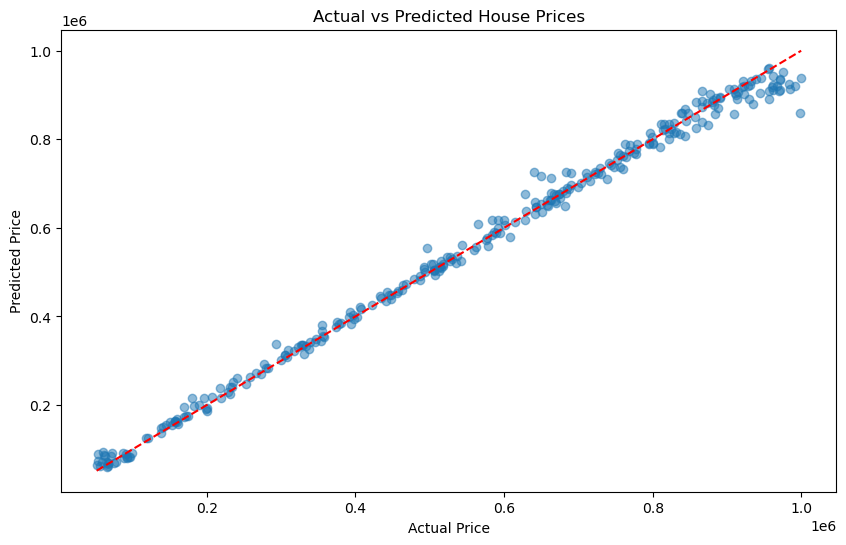

In [86]:
# Access trained model from results dictionary
best_model = results['Random Forest']['model']
evaluate_model(best_model, X_test_encoded, y_test)


## Learning Curves Analysis

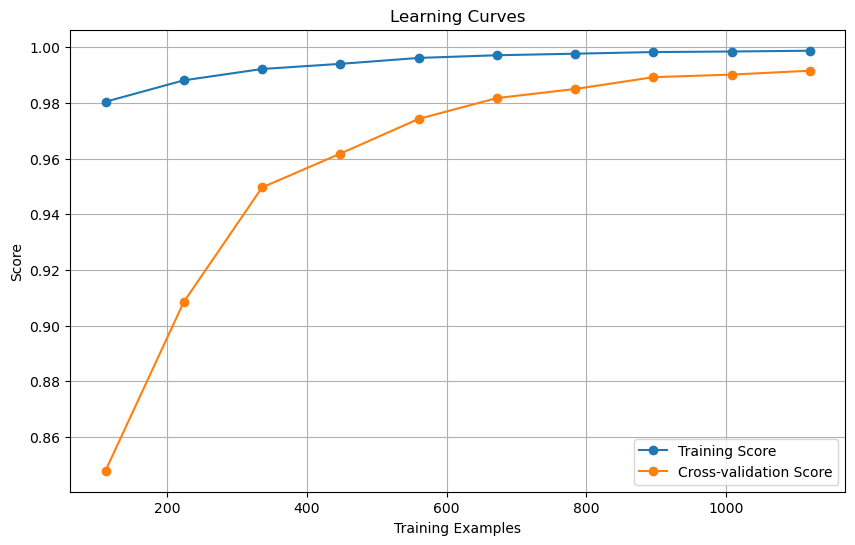

In [90]:
from sklearn.model_selection import learning_curve

def plot_learning_curves(model, X, y):
    """Plot learning curves to detect overfitting"""
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10))
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
    plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', label='Cross-validation Score')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title('Learning Curves')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Plot learning curves
plot_learning_curves(best_model, X_train_encoded, y_train)


## Model Deployment

In [98]:
import joblib
import os

def save_model(model, feature_names, path='model/'):
    """Save model and feature names only (no scaler/encoder used)"""
    os.makedirs(path, exist_ok=True)
    
    joblib.dump(model, f'{path}model.joblib')
    joblib.dump(feature_names, f'{path}features.joblib')

# Call this with your encoded data
save_model(best_model, X_train_encoded.columns)


In [101]:
def predict_house_price(features_df, model_path='model/'):
    import joblib
    import pandas as pd

    # Load model and feature names
    model = joblib.load(f'{model_path}model.joblib')
    features = joblib.load(f'{model_path}features.joblib')

    # Encode new data (one-hot encode categorical columns same as training)
    # You must know which columns were categorical during training
    categorical_cols = ['Location', 'Condition', 'Garage']  # adjust to your data
    
    # Convert categorical columns to string (if not already)
    for col in categorical_cols:
        features_df[col] = features_df[col].astype(str)

    # One-hot encode using pd.get_dummies
    features_encoded = pd.get_dummies(features_df)

    # Add any missing columns with zeros
    for col in features:
        if col not in features_encoded.columns:
            features_encoded[col] = 0

    # Make sure columns are in the same order as the model expects
    features_encoded = features_encoded[features]

    # Predict
    prediction = model.predict(features_encoded)

    return prediction[0]


In [102]:
new_house = pd.DataFrame({
    'Area': [2000],
    'Bedrooms': [3],
    'Bathrooms': [2],
    'Location': ['Downtown'],      
    'Condition': ['Good'],
    'Garage': ['Yes'],
})

predicted_price = predict_house_price(new_house)
print(f"\nPredicted House Price: ${predicted_price:,.2f}")



Predicted House Price: $61,006.56
